['Coal', 'Nat Gas', 'Oil', 'Nuclear', 'New Nuclear', 'Hydro', 'Solar', 'Wind', 'New Wind (Offshore)', 'New Wind (Onshore)', 'Geothermal', 'H2 - Photo Conv']
['k', '#A9A9A9', '#696969', '#8B0000', '#FF0000', 'g', '#FFD700', '#1E90FF', '#0000FF', '#87CEFA', '#8B4513', '#8A2BE2']


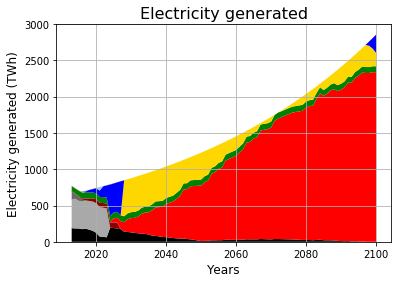

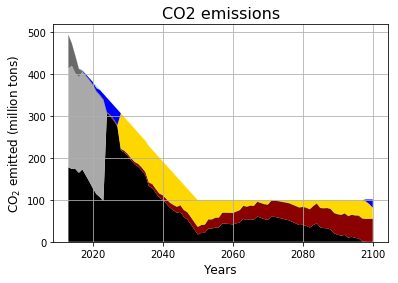

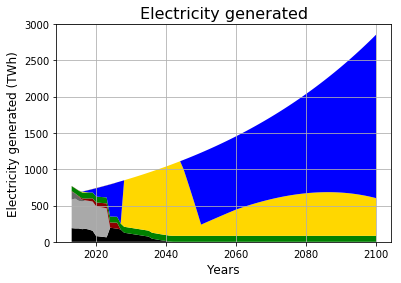

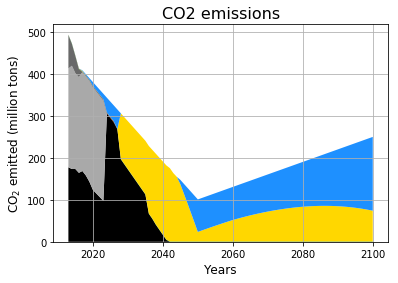

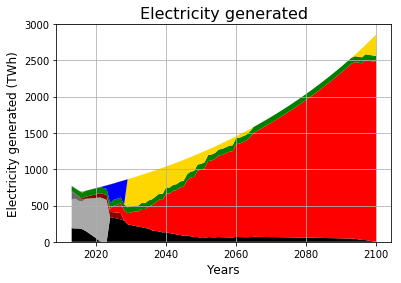

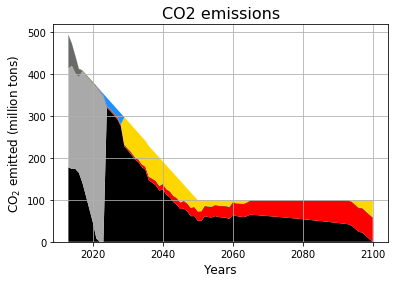

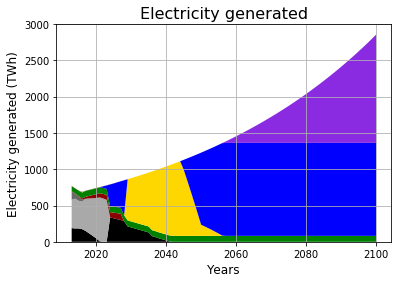

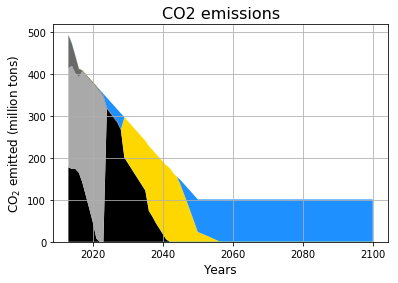

<Figure size 360x72 with 0 Axes>

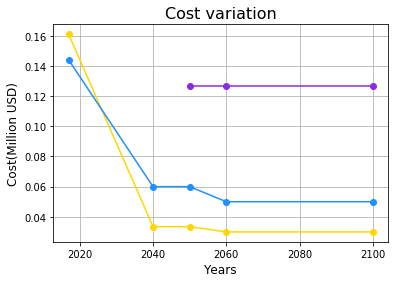

In [16]:
import xlrd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

title1='Electricity generated'
title2='CO2 emissions'
yax1='Electricity generated (TWh)'
yax2='CO$_2$ emitted (million tons)'
format='.png'

f=[]
mleg=[]
mcol=[]

f.append('conv_nuc')
f.append('conv_nonuc')
f.append('i2cner_nuc')
f.append('i2cner_nonuc')


for k in range(4):
    wb=xlrd.open_workbook(f[k]+'_final_2018-12-31.xlsx')    
    sheet1 = wb.sheet_by_index(0)
    sheet2 = wb.sheet_by_index(1)

    r1=int(sheet1.nrows)
    c1=int(sheet1.ncols)

    labels=[]
    colours=[]
    x=np.zeros(c1-2)
    y=np.zeros((r1-1,c1-2))

    for i in range(1,r1):
        colours.append(str(sheet1.cell_value(i,0)))
        labels.append(sheet1.cell_value(i,1))
        if (sheet1.cell_value(i,1) in mleg)==False:
            mleg.append(sheet1.cell_value(i,1))
        if (sheet1.cell_value(i,0) in mcol)==False:
            mcol.append(sheet1.cell_value(i,0))
    
    
    #mleg.append(labels)
    #mcol.append(colours)
    
    for i in range(2,c1):
        x[i-2]=sheet1.cell_value(0,i)
        for j in range(1,r1):
            if type(sheet1.cell_value(j,i)) == float:
                y[j-1,i-2]=sheet1.cell_value(j,i)
            else :
                y[j-1,i-2]=0

    fig, ax = plt.subplots()
    ax.stackplot(x,y/1000.0,colors=colours)
    #ax.legend(labels,loc='center left',bbox_to_anchor=(1,0.5),prop={'size': 10})
    plt.xlabel('Years',fontsize='12')
    plt.ylabel(yax1,fontsize='12')
    plt.title(title1,fontsize='16')
    plt.grid(True)
    fig.savefig(f[k]+'_elc.png', format='png', dpi=1000,bbox_inches='tight')


    r2=int(sheet2.nrows)
    c2=int(sheet2.ncols)

    labels2=[]
    colours2=[]
    x2=np.zeros(c2-2)
    y2=np.zeros((r2-1,c2-2))

    for i in range(1,r2):
        colours2.append(str(sheet2.cell_value(i,0)))
        labels2.append(sheet2.cell_value(i,1))
        if (sheet1.cell_value(i,1) in mleg)==False:
            mleg.append(sheet1.cell_value(i,1))
        if (sheet1.cell_value(i,0) in mcol)==False:
            mcol.append(sheet1.cell_value(i,0))
    
    #mleg.append(labels2)
    #mcol.append(colours2)
        
    for i in range(2,c2):
        x2[i-2]=sheet2.cell_value(0,i)
        for j in range(1,r2):
            if type(sheet2.cell_value(j,i)) == float:
                y2[j-1,i-2]=sheet2.cell_value(j,i)
            else :
                y2[j-1,i-2]=0

    fig2, ax2 = plt.subplots()
    ax2.stackplot(x2,y2,colors=colours2)
    #ax2.legend(labels2,loc='center left',bbox_to_anchor=(1,0.5),prop={'size': 10})
    plt.xlabel('Years',fontsize='12')
    plt.ylabel(yax2,fontsize='12')
    plt.title(title2,fontsize='16')
    plt.grid(True)
    fig2.savefig(f[k]+'_co2.png', format='png', dpi=1000,bbox_inches='tight')

print((mleg))
print((mcol))    
    

fig3 = plt.figure(figsize=(5,1))
patches = [
    mpatches.Patch(color=color, label=label)
    for label, color in zip(mleg, mcol)]
fig3.legend(patches, mleg, loc='center', frameon=False,ncol=int(len(mleg)/3),fontsize='large')
fig3.savefig('legend.png', format='png', dpi=1000,bbox_inches='tight')

wb=xlrd.open_workbook('cost.xlsx')    
sheet1 = wb.sheet_by_index(0)
r1=int(sheet1.nrows)
c1=int(sheet1.ncols)

labels4=[]
colours4=[]
x4=[2017,2040,2050,2060,2100]
y4=np.zeros((r1-1,c1-2))
for i in range(1,r1):
    colours4.append(str(sheet1.cell_value(i,0)))
    labels4.append(sheet1.cell_value(i,1))
for i in range(2,c1):
    for j in range(1,r1):
        if type(sheet1.cell_value(j,i)) == float:
            y4[j-1,i-2]=sheet1.cell_value(j,i)
        else:
            y4[j-1,i-2]=None

fig4, ax4 = plt.subplots()
ax4.plot(x4,y4[0,:],color=colours4[0],marker='o')
ax4.plot(x4,y4[1,:],color=colours4[1],marker='o')
ax4.plot(x4,y4[2,:],color=colours4[2],marker='o')
plt.xlabel('Years',fontsize='12')
plt.ylabel('Cost(Million USD)',fontsize='12')
plt.title('Cost variation',fontsize='16')
plt.grid(True)
fig4.savefig('cost.png', format='png', dpi=1000,bbox_inches='tight')

